# CAMB non-linear matter power spectrum exploration (_Halofit_-$\nu$)

In [9]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import camb
from camb import model, initialpower

from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors
prettyplot()
pretty_colors = prettycolors()

# Matter $P(k)$ for different $m_\nu$ at $z = 0.53$

In [37]:
def plot_pk_mnu(): 
    fig = plt.figure(figsize=(7,7))
    sub = fig.add_subplot(111)
    for inu, mnu in enumerate(np.arange(0.0, 1.2, 0.2)): 
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=mnu)
        pars.set_dark_energy() #re-set defaults
        pars.InitPower.set_params(ns=0.965)
        pars.set_matter_power(redshifts=[0.53], kmax=2.0) # CMASS redshift 

        #Non-Linear spectra (Halofit)
        pars.NonLinear = model.NonLinear_both

        #calculate results for these parameters
        results = camb.get_results(pars)
        label = None 
        lstyle = '--'
        if mnu == 0.: 
            label = r"$m_\nu = 0.$"
            lstyle = '-'
        elif mnu == 1.: 
            label = r"$m_\nu = 1.$"
            lstyle = '-'
        k, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)

        sub.plot(k, pk[0,:], color=pretty_colors[inu % 20], label=label, ls=lstyle)

    sub.set_xscale('log') 
    sub.set_xlim([10**-3, 10**0])
    sub.set_xlabel('$\mathtt{k}$', fontsize=25)
    sub.set_yscale('log') 
    sub.set_ylim([10**1.7, 10**4.5])
    sub.set_ylabel('$\mathtt{P_m(k)}$', fontsize=25)

    sub.legend(loc = 'lower left')

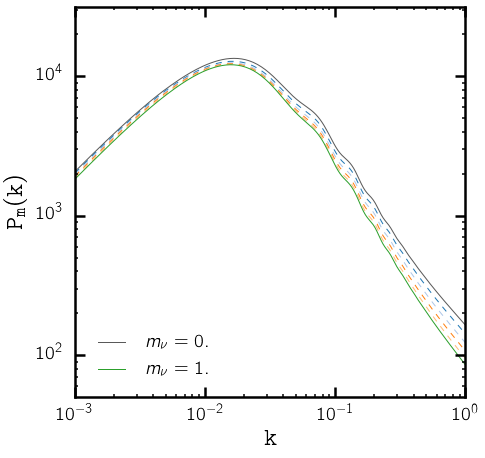

In [38]:
plot_pk_mnu()

In [18]:
mnus = np.arange(0.0, 1.2, 0.2)
ks, delP = [], [] 
for inu, mnu in enumerate(mnus): 
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=mnu)
    pars.set_dark_energy() #re-set defaults
    pars.InitPower.set_params(ns=0.965)
    pars.set_matter_power(redshifts=[0.53], kmax=2.0) # CMASS redshift 
    
    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both

    #calculate results for these parameters
    results = camb.get_results(pars)
    k, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
    if mnu == 0.: 
        pk_mnu0 = pk
    else: 
        delP.append(pk_mnu0 - pk)
        ks.append(k) 

In [35]:
def plot_delp_mnu(): 
    fig = plt.figure(figsize=(7,7))
    sub = fig.add_subplot(111)
    for inu, mnu in enumerate(mnus[1:]): 
        sub.plot(ks[inu], delP[inu].T, c=pretty_colors[inu], label=r'$m_\nu = '+str(round(mnu,2))+'$')
    sub.set_xscale('log') 
    sub.set_xlim([10**-3, 10**0])
    sub.set_xlabel('$\mathtt{k}$', fontsize=25)
    sub.set_ylabel(r'$\mathtt{P_m}^{\Sigma \mathtt{m}_\nu = 0}\mathtt{(k)} - \mathtt{P_m}^{\Sigma \mathtt{m}_\nu}\mathtt{(k)}$', fontsize=25)
    sub.legend(loc='upper right')


## <font color='blue'>_Zhao et al. (2013)_ </font> galaxy $P(k)$ model
For ___one___ of their galaxy $P(k)$ models, they use the $\mathtt{Halofit}$ matter power spectrum above: 

$$ P_g(k;z) = b_\mathrm{HF}^2 P_{\mathrm{HF}_\nu}(k;z) + P_\mathrm{HF}$$

where $b_\mathrm{HF}$ represent the bias and $P_\mathrm{HF}$ represents the shot noise. 

So to get an idea of how fiber collisions can affect the $\sum m_\nu$ inferred from the $P_g(k)$, lets look at $\Delta P_m(k)$ for different $\sum m_\nu$. 

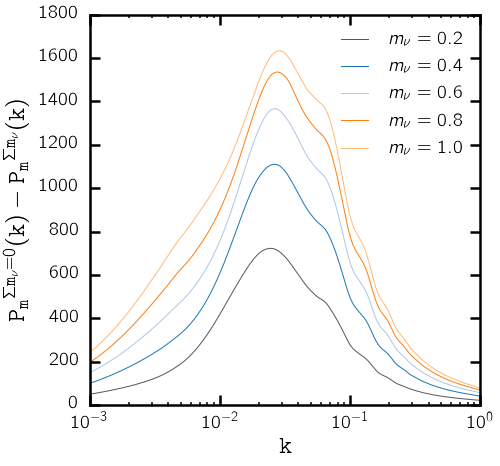

In [36]:
plot_delp_mnu()